In [5]:
import numpy as np
import math as math
import astropy.units as u
import astropy.constants as c

def abs_coeff_r(T, nu, n_0, r):
    """calculates the absorption coefficient alpha_nu that is dependent on r through the relation n = n_0*r^-2.
    For fully ionized hydrogen, n_e = n_i & Z=1
    T = temperature
    nu = frequency
    n_0 = initial number density profile
    r = distance to absorption (from observer?) => variable
    """
    C = 3.692 * (10**8)  # the  number in front of the expression
    BB = 1 - np.exp(-(c.h * nu) / (c.k_B * T))  # term found in the blackbody spectrum
    g = (
        10.6 + 1.9 * np.log10(T.to_value()) + 1.26 * np.log10(nu.to_value())
    )  # Gaunt factor
    return (C * BB * g * (n_0**2)) / (np.sqrt(T) * (nu**3) * 4 * (r**4))

In [6]:
# example values
T = 10**6 * u.K  # K
nu = 10 * 8 * u.Hz  # Hz = 100 MHz
n_0 = 10**35 * (u.meter ** (-3))  # m^-3

example_value = abs_coeff_r(T, nu, n_0, 1 * c.R_sun)
print(example_value)

7.295823683134981e+20 1 / (Hz3 K(1/2) m10)


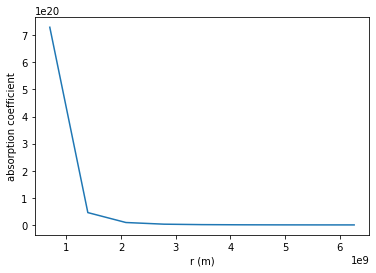

In [30]:
#plot a alpha_nu - r diagram
import matplotlib.pyplot as plt

r_list = [(x*c.R_sun).to_value() for x in range(1, 10)]
alpha_nu_list = [abs_coeff_r(T, nu, n_0, y).to_value() for y in r_list]
#print(alpha_nu_list)

#just to check the shape of the function
a_r = plt.subplot()
a_r.plot(r_list, alpha_nu_list)
a_r.set_xlabel("r (m)")
a_r.set_ylabel("absorption coefficient")
plt.show()

The absorption coefficient (AC) was derived using the density profile which decreases as r^-2. While calculating the AC, I used astropy units to see the resulting units of the AC. However, I'm not sure if these are the right units as I have left the Gaunt factor to be dimensionless (the code doesn't compute the log of a dimensionful variable). 

The plot makes sense as r^-4, but plots for any r really as I don't know what values the AC should be/is expected to be. 

In [33]:
def opt_depth(d):
    """calculate the optical depth given a radius from which the absorption coefficient is obtained.
    d = distance to absorption, from observer
    """
    #take 20 steps, for instance
    #taking d to be up to the position of the planet
    dr = d/20
    dr_array = np.arange(1, d, dr)
    tau_nu = 0

    for r in dr_array:
        print(r)
        alpha_nu = abs_coeff_r(T, nu, n_0, r)
        tau_nu += alpha_nu*dr
    
    return tau_nu

The method I use in calculating the optical depth (OD) is by summing all the contributions from each new r + dr times the AC at that r.

In [34]:
example_OD = opt_depth(c.pc.to_value())
print(example_OD)

1.0
1542838790745684.5
3085677581491368.0
4628516372237051.0
6171355162982735.0
7714193953728419.0
9257032744474100.0
1.0799871535219784e+16
1.2342710325965468e+16
1.3885549116711152e+16
1.5428387907456836e+16
1.697122669820252e+16
1.85140654889482e+16
2.0056904279693884e+16
2.159974307043957e+16
2.3142581861185252e+16
2.4685420651930936e+16
2.622825944267662e+16
2.7771098233422304e+16
2.9313937024167988e+16
2.636834625147468e+71 1 / (Hz3 K(1/2) m6)
